### Imports

In [2]:
#Imports
import numpy as np # linear algebra
import pandas as pd # 데이터 전처리
import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import plotly.graph_objects as go
import plotly.express as px

#Seaborn theme
sns.set_theme(style="darkgrid")

### 데이터 로드

In [3]:
#Read csv
df = pd.read_csv("online_store_customer_data.csv", index_col=0)
df.head()

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


### 데이터 전처리

In [71]:
# 결측치 제거
df = df.dropna(axis=0)
df.head(10)

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
1/3/2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
1/3/2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
1/4/2019,151208,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20
1/4/2019,151209,Female,41.0,Married,Vermont,Gold,Unemployment,Card,1.0,2730.60
1/4/2019,151210,Female,56.0,Married,California,Basic,Employees,PayPal,0.0,1712.82


In [4]:
df["Amount_spent"] = pd.to_numeric(df["Amount_spent"])
df["Amount_spent"].sum()

3219819.25

In [5]:
df.groupby("Gender")["Amount_spent"].sum()

Gender
Female    1739131.49
Male      1445724.74
Name: Amount_spent, dtype: float64

### 통계 분석

#### 1. 독립 표본 t 검정 : 두 집단의 평균 차이를 검정
1. Levene의 등분산 검정  
2. 독립표본 t 검정

In [72]:
import scipy.stats as stats

In [73]:
# 남자 소비액과 여자 소비액으로 분리
df_Male = df[df['Gender'] == 'Male']
df_Female = df[df['Gender'] == 'Female']
df_Male = df_Male.reset_index()
df_Female = df_Female.reset_index()

#Levene의 등분산 검정 
lresult = stats.levene(df_Male.Amount_spent, df_Female.Amount_spent)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))
# p-value > 0.05이므로 분산이 동일함
# F 값은 집단 간 분산/집단 내 분산을 말함

LeveneResult(F) : 0.430 
p-value : 0.512


In [121]:
# 독립표본 t 검정
# 앞서 등분산 검정에서 분산이 동일했으면 equal_var = True, 동일하지 않았다면 False로 설정
result = stats.ttest_ind(df_Male.Amount_spent, df_Female.Amount_spent, equal_var=True) 
print('t statistic : %.3f \np-value : %.3f' % (result))
# p-value > 0.05이므로 성별끼리의 소비액에는 차이가 없다(관련이 없다)

t statistic : -0.074 
p-value : 0.941


### 성별 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Gender')

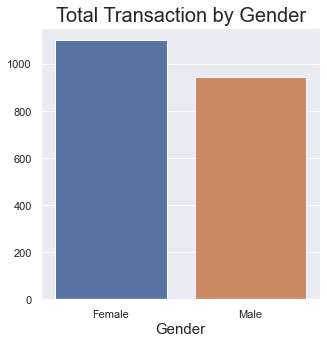

In [76]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Gender", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Gender')

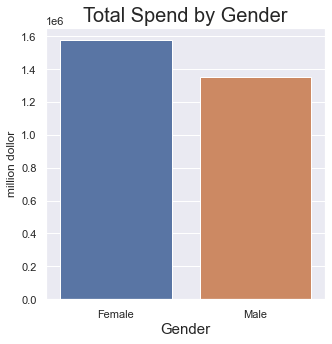

In [77]:
# 성별로 그룹핑 후 전체 소비액
df_by_gender = df.groupby("Gender").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Gender", fontsize=20)

In [78]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Gender')

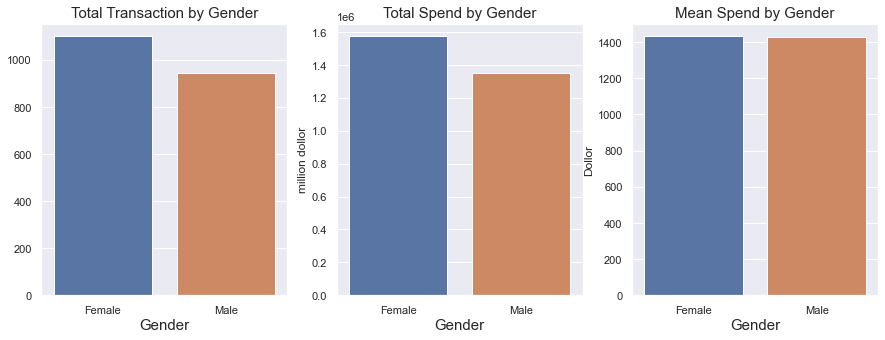

In [79]:
fig, ax = plt.subplots(ncols=3)
# 성별로 그룹핑하여 전체 거래 수
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender, ax=ax[0])
ax1.set_xlabel("Gender", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Gender", fontsize=15)
# 성별로 그룹핑하여 총액
df_by_gender = df.groupby("Gender").sum().reset_index()
ax2 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[1])
ax2.set_xlabel("Gender", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Gender", fontsize=15)
# 성별로 그룹핑하여 평균 소비액
df_by_gender = df.groupby("Gender").mean().reset_index()
ax3 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[2])
ax3.set_xlabel("Gender", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Gender", fontsize=15)

#### Plotly graphic_object

In [80]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total transaction by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [81]:
# 성별로 그룹핑 후 총액 시각화
df_by_gender = df.groupby("Gender").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [82]:
# 성별로 그룹핑 후 평균 소비액 시각화
df_by_gender = df.groupby("Gender").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn Pie Graph

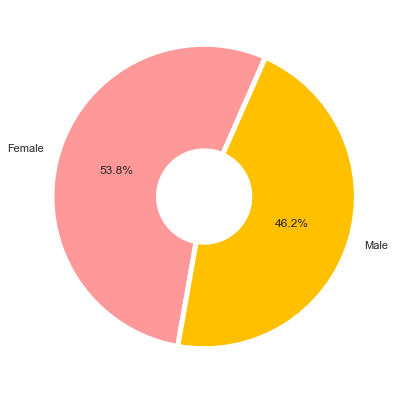

In [83]:
# 성별 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_gender = df.groupby("Gender").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_gender["Amount_spent"], labels=df_by_gender["Gender"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [84]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_gender = df.groupby("Gender").sum().reset_index()
fig = px.pie(df_by_gender, values='Amount_spent', names='Gender', hole=.3)
fig.show()

### 혼인 여부 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Marital_status')

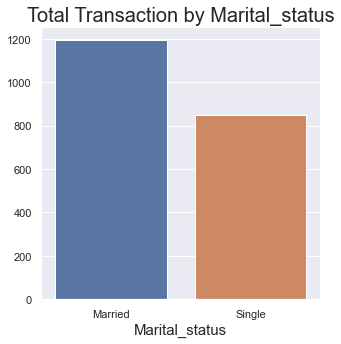

In [85]:
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Marital_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Marital_status')

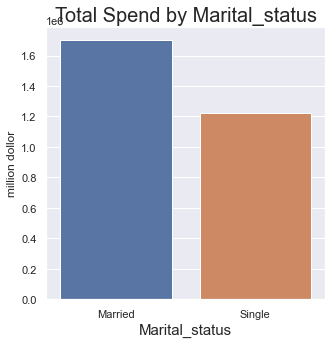

In [86]:
# 혼인 여부로 총액 그룹핑
df_by_martial = df.groupby("Marital_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Marital_status", fontsize=20)

In [87]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Marital_status')

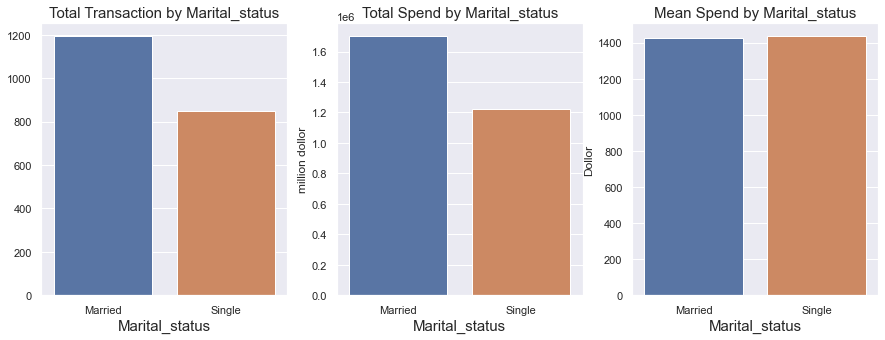

In [88]:
fig, ax = plt.subplots(ncols=3)
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[0])
ax1.set_xlabel("Marital_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 총액
df_by_martial = df.groupby("Marital_status").sum().reset_index()
ax2 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[1])
ax2.set_xlabel("Marital_status", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 평균 소비액
df_by_martial = df.groupby("Marital_status").mean().reset_index()
ax3 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[2])
ax3.set_xlabel("Marital_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Marital_status", fontsize=15)

#### Plotly 막대 그래프

In [89]:
# 결혼 여부로 그룹핑 후 거래 횟수 시각화
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [90]:
# 결혼 여부로 그룹핑 후 총액 시각화
df_by_martial = df.groupby("Marital_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [91]:
# 결혼 여부로 그룹핑 후 평균 소비액 시각화
df_by_martial = df.groupby("Marital_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

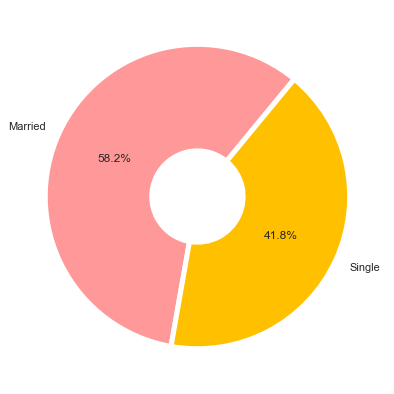

In [92]:
# 결혼 여부 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_martial = df.groupby("Marital_status").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_martial["Amount_spent"], labels=df_by_martial["Marital_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프
1. hole 인자는 가운데 구멍 크기 0.3 = 30%

In [93]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_martial = df.groupby("Marital_status").sum().reset_index()
fig = px.pie(df_by_martial, values='Amount_spent', names='Marital_status', hole=.3)
fig.show()

### 지역으로 그룹핑

Text(0.5, 1.0, 'Total Transaction by State')

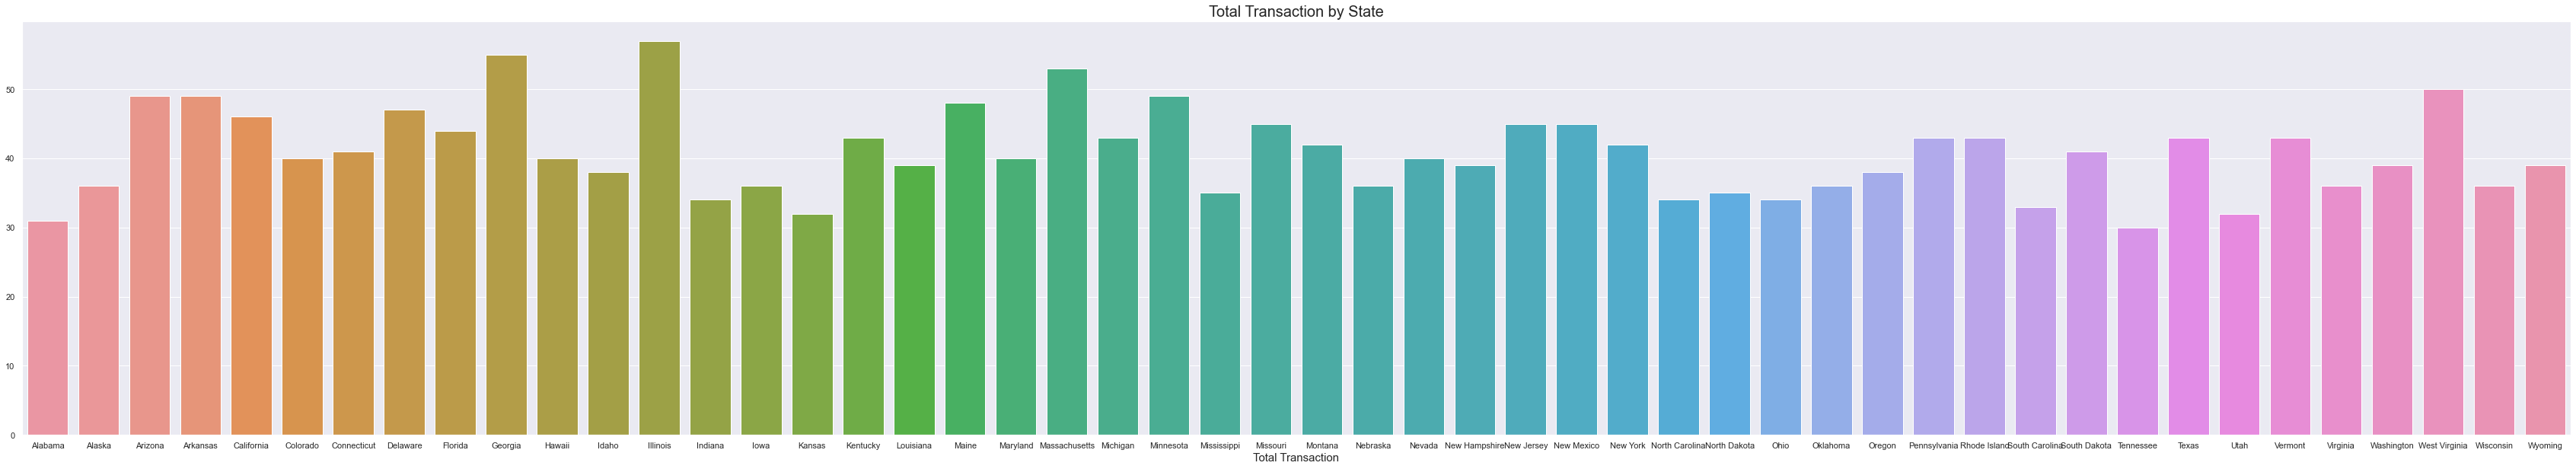

In [94]:
# 지역으로 그룹핑
df_by_state = df.groupby("State_names").size().reset_index()
plt.rcParams["figure.figsize"] = (60, 10)
ax = sns.barplot(x="State_names", y=0, data=df_by_state, order=df_by_state.State_names)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by State", fontsize=20)

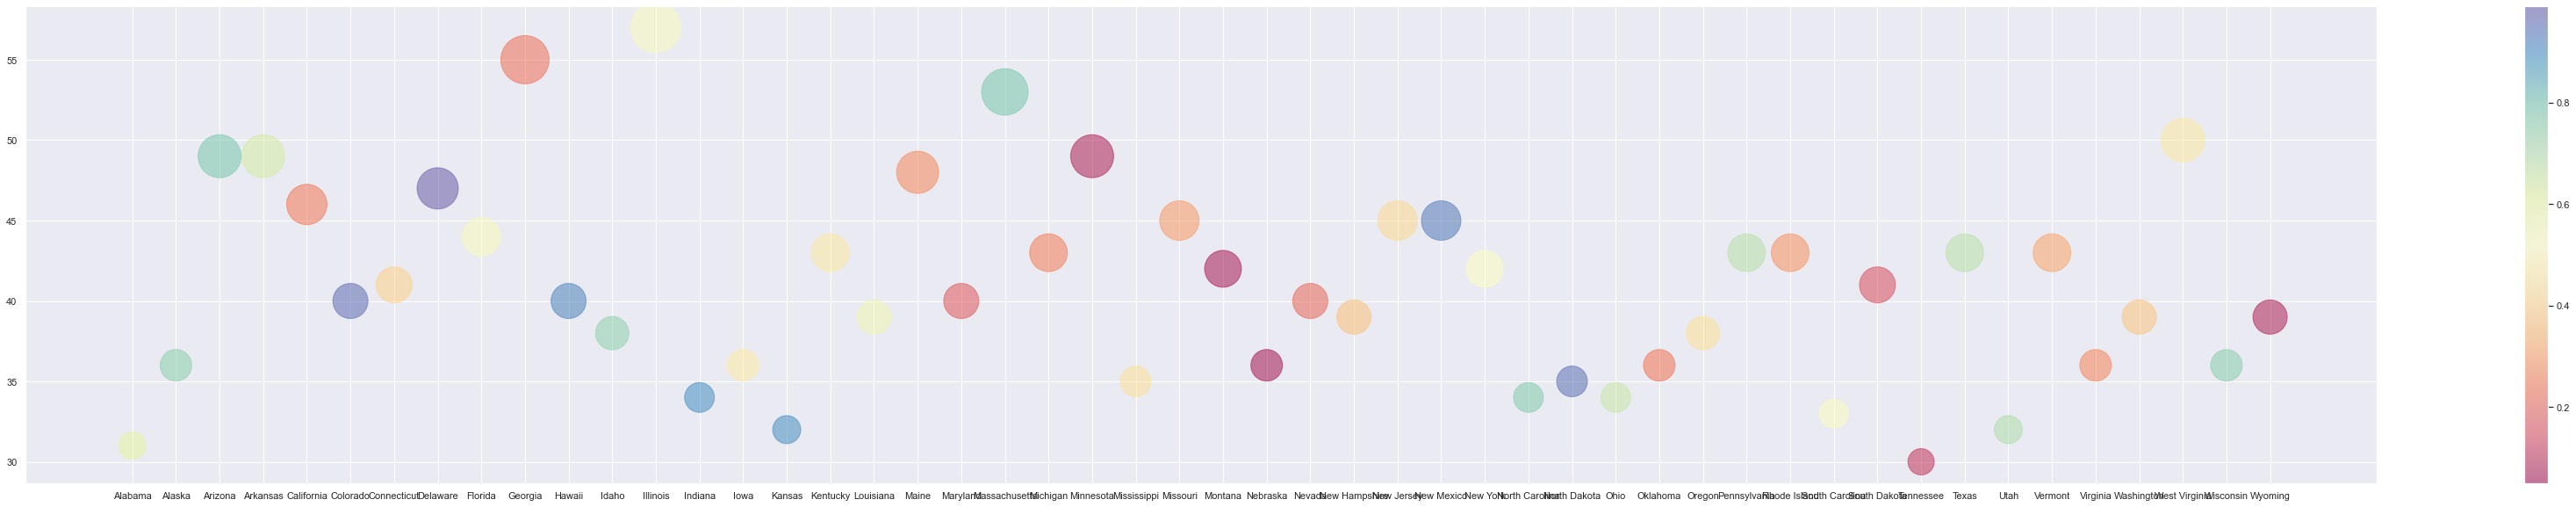

In [95]:
area = (df_by_state[0])**2  # 발생 건수에 따라 크기 조절
colors = np.random.rand(len(df_by_state["State_names"])) # xtick 길이만큼 색상 매번 랜덤

plt.scatter(df_by_state["State_names"], df_by_state[0], s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

### 멤버십 등급 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Segment')

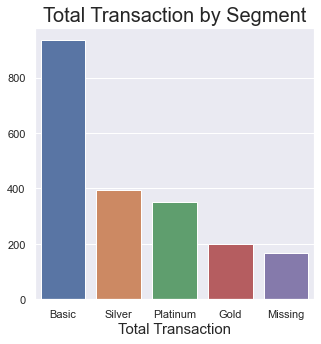

In [96]:
# 멤버쉽 등급으로 그룹핑 - 총 거래 수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Segment", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Segment')

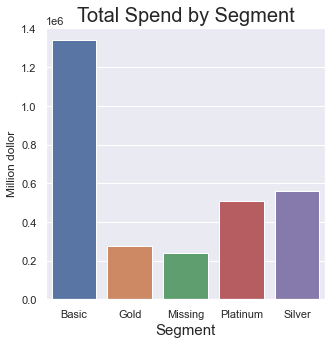

In [97]:
# 멤버쉽 등급으로 그룹핑 - 총 소비 액수
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Segment", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Segment", fontsize=20)

In [98]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Segment')

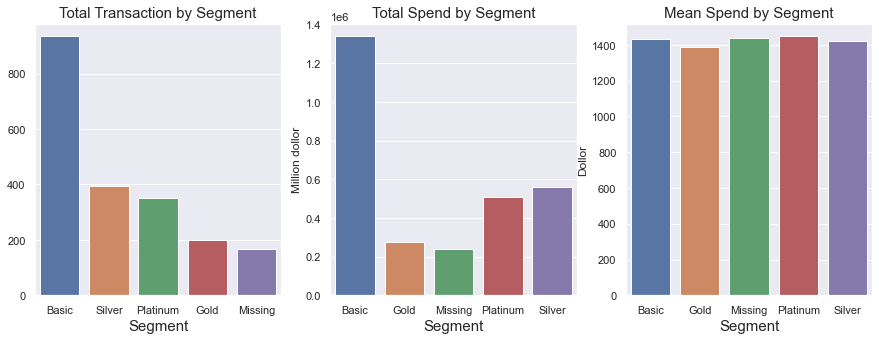

In [99]:
fig, ax = plt.subplots(ncols=3)

df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment, ax = ax[0])
ax1.set_xlabel("Segment", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Segment", fontsize=15)

df_by_segment = df.groupby("Segment").sum().reset_index()
ax2 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[1])
ax2.set_xlabel("Segment", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Segment", fontsize=15)

# 등급별 평균 소비 액수
df_by_segment = df.groupby("Segment").mean().reset_index()
ax3 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[2])
ax3.set_xlabel("Segment", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Segment", fontsize=15)

#### Plotly 막대 그래프

In [100]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [101]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [102]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

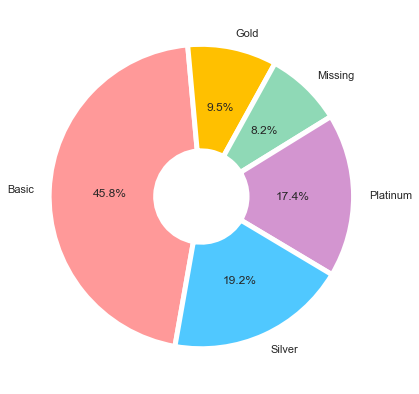

In [103]:
# 총액 비율
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_segment["Amount_spent"], labels=df_by_segment["Segment"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [104]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_segment = df.groupby("Segment").sum().reset_index()
fig = px.pie(df_by_segment, values='Amount_spent', names='Segment', hole=.3)
fig.show()

### 구직 상태로 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Employees_status')

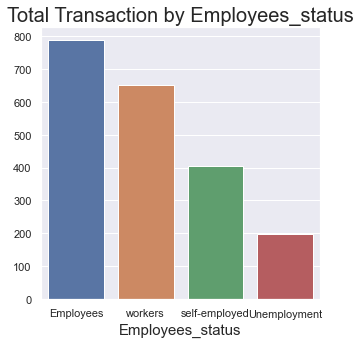

In [105]:
# 구직 상태로 그룹핑
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Employees_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Employees_status')

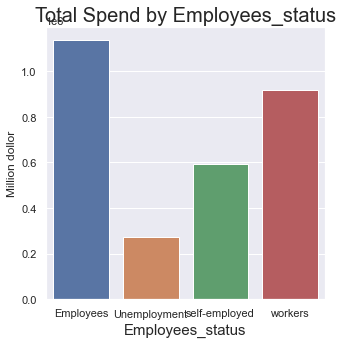

In [106]:
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Employees_status", fontsize=20)

In [107]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Employees_status')

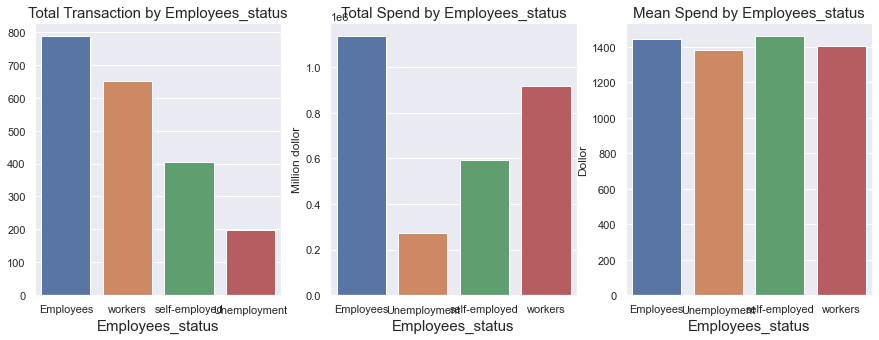

In [108]:
fig, ax = plt.subplots(ncols=3)
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[0])
ax1.set_xlabel("Employees_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Employees_status", fontsize=15)

df_by_employee = df.groupby("Employees_status").sum().reset_index()
ax2 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[1])
ax2.set_xlabel("Employees_status", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Employees_status", fontsize=15)

# 구직 상태 별 평균 소비액
df_by_employee = df.groupby("Employees_status").mean().reset_index()
ax3 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[2])
ax3.set_xlabel("Employees_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Employees_status", fontsize=15)

#### Ploty 막대 그래프

In [109]:
# 구직 상태로 그룹핑하여 전체 거래 수
df_by_segment = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [110]:
# 구직 상태로 그룹핑하여 총액
df_by_segment = df.groupby("Employees_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [111]:
# 구직 상태로 그룹핑하여 평균 소비액
df_by_segment = df.groupby("Employees_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

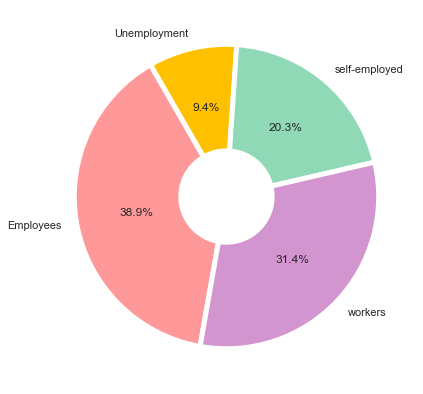

In [112]:
# 전체 총액 비율
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_employee["Amount_spent"], labels=df_by_employee["Employees_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [113]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_employee = df.groupby("Employees_status").sum().reset_index()
fig = px.pie(df_by_employee, values='Amount_spent', names='Employees_status', hole=.3)
fig.show()

### Faceted logistic regression - implot

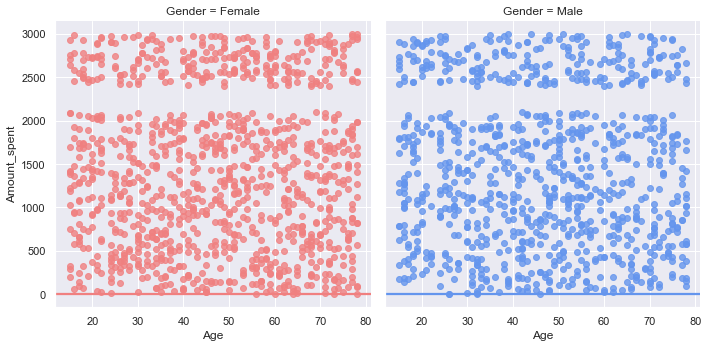

In [114]:
pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Amount_spent", col="Gender", hue="Gender", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)

### 회귀 분석

In [115]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [116]:
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df_te = pd.DataFrame(te_ary, columns=te.columns_)
df_te

,A,D,E,G,I,M,P,R,S,T,...,l,m,n,o,p,r,s,t,u,y
0,False,True,False,False,True,False,False,False,False,True,...,False,False,True,True,False,True,True,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [117]:
itemsets = apriori(df_te, min_support=0.05, use_colnames=True)

In [118]:
itemsets

,support,itemsets


In [119]:
association_rules(itemsets, metric="lift", min_threshold=1)
# 지지도 0.05 이상이 하나도 없어서 개같이 멸망

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

### 상관관계 분석

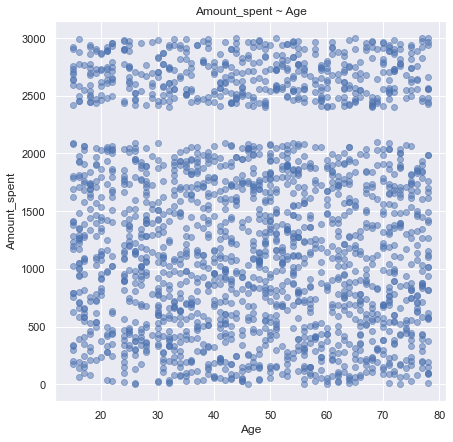

In [120]:
# Age와 Amount_spent 상관 분석
X = df.Age.values
Y = df.Amount_spent.values 
plt.scatter(X, Y, alpha=0.5) 
plt.title('Amount_spent ~ Age') 
plt.xlabel('Age') 
plt.ylabel('Amount_spent') 
plt.show()
# 대각선으로 올라가거나 내려가면 양/음의 상관관계인 것
# 누가 봐도 관련 없어 보임